## 순환 신경망을 이용한 문장 생성 예제

**Simple RNN, GRU, LSTM 활용**

In [ ]:
!git clone "https://github.com/brunoklein99/deep-learning-notes"

Cloning into 'deep-learning-notes'...
remote: Enumerating objects: 491, done.
remote: Total 491 (delta 0), reused 0 (delta 0), pack-reused 491
Receiving objects: 100% (491/491), 57.55 MiB | 13.51 MiB/s, done.
Resolving deltas: 100% (183/183), done.


In [1]:
#라이브러리 호출
import re   #문자열 정규식
import os   #디렉토리 관리
import glob   #디렉토리 관리(2)
import nltk   #자연어 처리
import tensorflow as tf   #텐서관리
import matplotlib.pyplot as plt   #데이터 시각화

In [2]:
#/content/deep-learning-notes/shakespeare.txt

txt_file_path = "/content/shakespeare.txt"
txt_list = glob.glob(txt_file_path)

raw_corpus = []
for txt_file in txt_list:
    with open(txt_file, "r") as f:
        raw = f.read().splitlines()
        raw_corpus.extend(raw)

In [3]:
#단어 단위 분할 함수+++++++++++++++++++++++++++++++
def clean_str(string, TREC=False):
    """
    Tokenization/string cleaning for all datasets except for SST.
    Every dataset is lower cased except for TREC
    """
    #코드 수정==========================
    string = re.sub(r"[^A-Za-z!?\']", " ", string)
    string = re.sub(r'[" "]+', " ", string)
    #End================================
    
    string = re.sub(r"\'s", " \'s", string) 
    string = re.sub(r"\'ve", " \'ve", string) 
    string = re.sub(r"n\'t", " n\'t", string) 
    string = re.sub(r"\'re", " \'re", string) 
    string = re.sub(r"\'d", " \'d", string) 
    string = re.sub(r"\'ll", " \'ll", string) 
    
    string = re.sub(r"!", " ! ", string) 
    string = re.sub(r"\?", " \? ", string) 
    string = re.sub(r"\s{2,}", " ", string)
    
    #코드 수정==========================
    string = re.sub(r",", " ", string) 
    string = re.sub(r"\(", " ", string) 
    string = re.sub(r"\)", " ", string) 
    #End================================
    return string.strip() if TREC else string.strip().lower()
#"CNN_sentence", Kim Yoon, accessed Oct, 8, 2021, https://github.com/yoonkim/CNN_sentence
#End++++++++++++++++++++++++++++++++++++++++++++++++++


#문장별로 정제하기===========================
corpus_sample = [clean_str(sentence) for sentence in raw_corpus if len(sentence) != 0]
#End=========================================


print("*" * 50, end="\n\n")
print(raw_corpus[3], "\n\n" + "↓" * 30 + "\n\n", corpus_sample[3])
print("\n" + "*" * 50)

**************************************************

often releases Etexts that are NOT placed in the Public Domain!! 

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

 often releases etexts that are not placed in the public domain ! !

**************************************************


In [4]:
#데이터 일부 출력========
print("*" * 50)
for line in corpus_sample[10:15]:
    print(line, end="\n\n")
print("*" * 50)
#End======================

#data_len=================
print("\n*sentence num:", len(corpus_sample), end="\n\n")

**************************************************
distributed so long as such copies are for your or others

personal use only and are not distributed or used

commercially prohibited commercial distribution includes by any

service that charges for download time or for membership

project gutenberg is proud to cooperate with the world library

**************************************************

*sentence num: 115051



**************************************************
minimum word: 1
maximum word: 19
85% word: 11
**************************************************


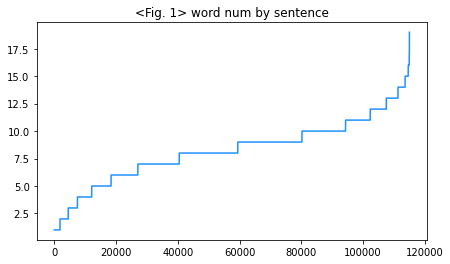

In [5]:
sentence_len = [len(sentence.split(" ")) for sentence in corpus_sample]
sentence_len.sort()


cut_size = int(len(sentence_len) * 0.85)
print("*" * 50)
print("minimum word:", sentence_len[0])
print("maximum word:", sentence_len[-1])
print("85% word:", sentence_len[cut_size])
print("*" * 50)

# #14개 이하 단어로 구성된 문장으로 정제
# corpus = [sentence for sentence in corpus if len(sentence.split(" ")) < 15]


#시각화==========================
plt.figure(figsize=(7, 4))
plt.title("<Fig. 1> word num by sentence")
plt.plot(sentence_len, color="#1e90ff")
plt.show()

#End=================================

In [6]:
one_word_sentence = {sentence for sentence in corpus_sample if len(sentence.split(" ")) == 1}

print("*" * 50)
for line in list(one_word_sentence)[10:15]:
    print(line, end="\n\n")
print("*" * 50)

print("\n*one word sentence num:", len(one_word_sentence))

**************************************************
performance

plays

praise

lady

ruminat

**************************************************

*one word sentence num: 833


**************************************************
*word num: 25003
**************************************************


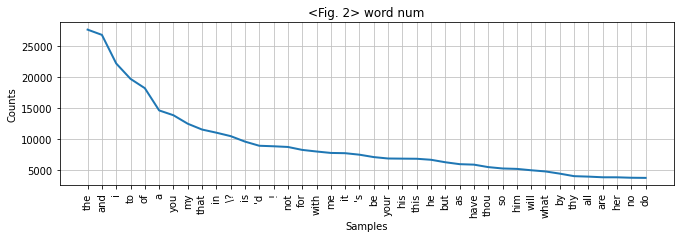

In [7]:
word_list_dup = [word for sentence in corpus_sample for word in sentence.split(" ")]
word_list = {word for word in word_list_dup}
nltk_text = nltk.Text(word_list_dup)

print("*" * 50)
print("*word num:", len(word_list))
print("*" * 50)


plt.figure(figsize=(11, 3))
plt.title("<Fig. 2> word num")
nltk_text.plot(40)
plt.show()

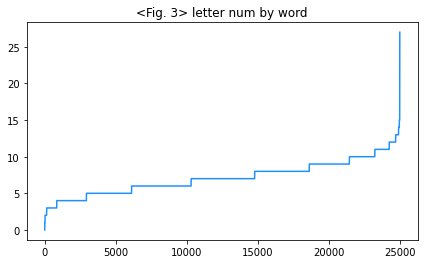

In [8]:
word_len = [len(word) for word in word_list]
word_len.sort()

#시각화==========================
plt.figure(figsize=(7, 4))
plt.title("<Fig. 3> letter num by word")
plt.plot(word_len, color="#1e90ff")
plt.show()
#End=================================

In [9]:
word_over_ten = [word for word in word_list if len(word) >= 15]

print("*" * 50)
for word in word_over_ten[:10]:
    print(word, end="\n\n")
print("*" * 50)

**************************************************
distinguishment

gloucestershire

unreconciliable

undistinguishable

interchangement

interrogatories

superstitiously

gioucestershire

uncomprehensive

circumscription

**************************************************


In [10]:
sample_corpus = None
corpus = []
for sentence in raw_corpus:
    if len(sentence) == 0: continue;   #길이가 0인 문장
    if sentence[-1] == ":": continue;   #문장의 끝이 ':'인 문장

    new_sentence = clean_str(sentence, TREC=False)

    if len(new_sentence.split(" ")) < 3: continue;   #단어가 2개 이하인 문장 제외
    if len(new_sentence.split(" ")) > 12: continue;   #토큰이 15개 이상인 문장
    
    #단어 중심===========
    letter_num_TF = True
    for word in new_sentence.split(" "):
        if len(word) > 14:   #글자 수 15개 이상 단어 제외
            letter_num_TF = False
            break
    if not letter_num_TF: continue
    #End=================
        
    new_sentence = "<start> " + new_sentence + " <end>"
    corpus.append(new_sentence)

In [11]:
word_list = {word for sentence in corpus for word in sentence.split(" ")}


#데이터 일부 출력========
print("*" * 50)
for line in corpus[10:15]:
    print(line, end="\n\n")
print("*" * 50)
#End======================


print("\n*sentence num:", len(corpus))
print("*word num:", len(word_list))

**************************************************
<start> commercially prohibited commercial distribution includes by any <end>

<start> service that charges for download time or for membership <end>

<start> project gutenberg is proud to cooperate with the world library <end>

<start> in the presentation of the complete works of william shakespeare <end>

<start> for your reading for education and entertainment however this <end>

**************************************************

*sentence num: 102066
*word num: 23944


In [12]:
 #토크나이즈 함수======================================
def tokenize(corpus):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(
        num_words=12000, 
        oov_token="<unk>",   #포함되지 못한 단어는 "<unk>"로 처리
        filters=' '   #전처리되었으므로 제외
    )
    
    tokenizer.fit_on_texts(corpus)   #매개변수로 토크나이저 내부 단어장 생성
    tensor = tokenizer.texts_to_sequences(corpus)   #매개변수 Tensor로 변환
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding="post", maxlen = 15)
    return tensor, tokenizer
#End====================================================


tensor, tokenizer = tokenize(corpus)

print("*tensor shape:", tensor.shape)
print("\n*one_sample:", tensor[:1])

print("\n" + "*" * 50)
for idx in tokenizer.index_word:
    print(idx, ":", tokenizer.index_word[idx])
    if idx >= 8: break
print("*" * 50)

*tensor shape: (102066, 15)

*one_sample: [[   2   26   15    4 7302  380 3689 3538   37  378  409    5    3    0
     0]]

**************************************************
1 : <unk>
2 : <start>
3 : <end>
4 : the
5 : and
6 : i
7 : to
8 : of
**************************************************


In [13]:
#학습데이터와 정답 데이터 분리하기
from sklearn.model_selection import train_test_split
src_input = tensor[:, :-1]   #마지막 토큰을 잘라내 소스문장 생성 => x_data
tgt_input = tensor[:, 1:]   #첫번째 idx인 <start>를 잘라내기 => target_data

enc_train, enc_val, dec_train, dec_val = train_test_split(src_input, tgt_input, test_size = 0.2, random_state = 2)

#텐서플로 데이터셋으로 만들기==============
BUFFER_SIZE = len(src_input)
BATCH_SIZE = 32

dataset = tf.data.Dataset.from_tensor_slices((src_input, tgt_input))   #tensor를 dataset으로 변환
# dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
#End=======================================

print("\n" + "*" * 50)
print("Source Train:", enc_train.shape)
print("Source val Train:", enc_val.shape)

print("\nTarget Train:", dec_train.shape)
print("Target val Train:", dec_val.shape)
print("*" * 50)


**************************************************
Source Train: (81652, 14)
Source val Train: (20414, 14)

Target Train: (81652, 14)
Target val Train: (20414, 14)
**************************************************


In [14]:
#모델 생성 클래스=================================
class TextGenerator(tf.keras.Model):
    def __init__(
            self,
            model_type, #"LSTM", "GRU", "RNN"
            vocab_size,   #단어사전 크기
        ):
        super().__init__()
        
        self.embedding = tf.keras.layers.Embedding(vocab_size, 500)
        
        if model_type == "LSTM":
            self.rnn_1 = tf.keras.layers.LSTM(2000, return_sequences=True)
        elif model_type == "GRU":
            self.rnn_1 = tf.keras.layers.GRU(2000, return_sequences=True)
        else:
            self.rnn_1 = tf.keras.layers.SimpleRNN(2000, return_sequences=True, activation="tanh")
            
        self.dropout_1 = tf.keras.layers.Dropout(rate=0.2)
        
        self.batnorm_1 = tf.keras.layers.BatchNormalization()
        self.linear = tf.keras.layers.Dense(vocab_size)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.rnn_1(out)
        out = self.dropout_1(out)
        
        out = self.batnorm_1(out)
        out = self.linear(out)
        
        return out
#End==============================================
    
    
#문장 예측 함수====================================
def generate_text(model, tokenizer, init_sentence="<start>", max_len=15):
    test_input = tokenizer.texts_to_sequences([init_sentence])
    test_tensor = tf.convert_to_tensor(test_input, dtype=tf.int64)
    end_token = tokenizer.word_index["<end>"]

    while True:
        predict = model(test_tensor)
        predict_word = tf.argmax(tf.nn.softmax(predict, axis=-1), axis=-1)[:, -1]
        test_tensor = tf.concat(
            [test_tensor, tf.expand_dims(predict_word, axis=0)], axis=-1
        )
        if predict_word.numpy()[0] == end_token: break
        if test_tensor.shape[1] >= max_len: break

    generated = ""
    for word_index in test_tensor[0].numpy():
        generated += tokenizer.index_word[word_index] + " "
    
    return generated
#End==============================================


#콜백 함수========================================
def train_model(epoch, logs):
    print("\n\n" + "*" * 25)
    words = ["i", "you", "love"]
    for init_word in words:
        sentence = generate_text(model, tokenizer, "<start> " + init_word, 15)
        print(sentence, end="\n\n")
    print("*" * 25)
    
testmodelcb = tf.keras.callbacks.LambdaCallback(on_epoch_end=train_model)
#End==============================================


#컴파일 및 학습 함수==============================
def compile_fit(model, callback_func):
    optimizer = tf.keras.optimizers.Adam()
    loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none'
    )

    model.compile(loss=loss, optimizer=optimizer)

    hist = model.fit(
        enc_train, dec_train, 
        epochs=4,
        batch_size=32,
        validation_data=(enc_val, dec_val),
        shuffle=True,
        callbacks=[callback_func],
        verbose=1
    )
    return None
#End==============================================

In [15]:
for src_sample, _ in dataset.take(1): break   #dataset으로부터 하나의 데이터 받아오기


In [16]:
model = TextGenerator(
    "SimpleRNN",
    tokenizer.num_words + 1,   #tokenizer.num_words: 단어사전 사이즈 + <pad>
)

model(src_sample)   #해당 데이터를 넣어줌으로써 모델 input_size 설정
model.summary()

Model: "text_generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       multiple                  6000500   
                                                                 
 simple_rnn (SimpleRNN)      multiple                  5002000   
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 batch_normalization (BatchN  multiple                 8000      
 ormalization)                                                   
                                                                 
 dense (Dense)               multiple                  24014001  
                                                                 
Total params: 35,024,501
Trainable params: 35,020,501
Non-trainable params: 4,000
____________________________________

In [ ]:
compile_fit(model, testmodelcb)


Epoch 1/4
2107/2552 [=======================>......] - ETA: 18s - loss: 4.1302

In [ ]:
model = TextGenerator(
    "GRU",
    tokenizer.num_words + 1,   #tokenizer.num_words: 단어사전 사이즈 + <pad>
)

model(src_sample)   #해당 데이터를 넣어줌으로써 모델 input_size 설정
model.summary()

In [ ]:
compile_fit(model, testmodelcb)


In [ ]:
model = TextGenerator(
    "LSTM",
    tokenizer.num_words + 1,   #tokenizer.num_words: 단어사전 사이즈 + <pad>
)

model(src_sample)   #해당 데이터를 넣어줌으로써 모델 input_size 설정
model.summary()

In [ ]:
compile_fit(model, testmodelcb)
